In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
Test1, Test2 = np.empty([8, 4096]), np.empty([8, 4096])
for i in range(1, 9):
    t1 = "RPi_data/Test_1_p1_g" + str(i) + "_2019-05-28_D3S.csv"
    t2 = "RPi_data/Test_2_p1_g" + str(i) + "_2019-05-28_D3S.csv"
    Test1[i-1] = np.sum(np.genfromtxt(t1, delimiter= ",").T, axis=1)
    Test2[i-1] = np.sum(np.genfromtxt(t2, delimiter= ",").T, axis=1)

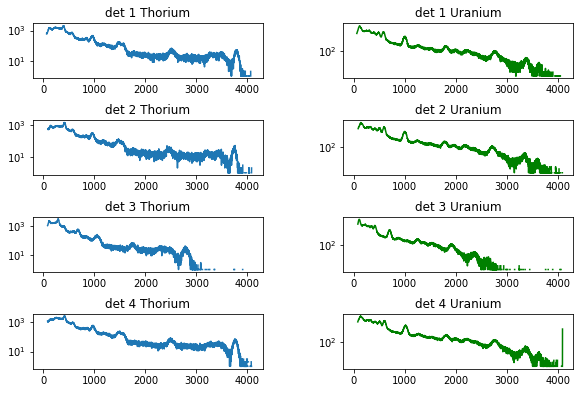

In [3]:
for i in range(1, 9):
    subplot = int(str(42)+str(i))
    #print(subplot)
    plt.subplot(subplot)
    if i % 2 == 1:
        det = i//2 + 1
        plt.plot(Test1[det-1])
        plt.yscale('log')
        plt.title("det " + str(det) + " Thorium")

    else:
        det = i//2
        plt.plot(Test2[det-1], 'g')
        plt.yscale('log')
        plt.title("det " + str(det) + " Uranium")

plt.subplots_adjust(top=1, bottom=-0.2, left=0, right=1.25, hspace=0.75, wspace=0.35)
plt.show()

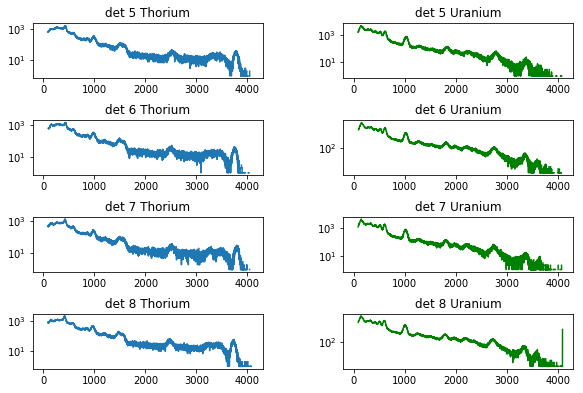

In [4]:
for i in range(1, 9):
    subplot = int(str(42)+str(i))
    #print(subplot)
    plt.subplot(subplot)
    if i % 2 == 1:
        det = i//2 + 1 + 4
        plt.plot(Test1[det-1])
        plt.yscale('log')
        plt.title("det " + str(det) + " Thorium")

    else:
        det = i//2 + 4
        plt.plot(Test2[det-1], 'g')
        plt.yscale('log')
        plt.title("det " + str(det) + " Uranium")

plt.subplots_adjust(top=1, bottom=-0.2, left=0, right=1.25, hspace=0.75, wspace=0.35)
plt.show()

In [7]:
%%writefile tryPeakfinder.py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
This is a helper fuction that looks at each index and checks if it is a peak.
REMOVED:::::Does not look at values under 1/4 of np.average(data):::::::
'''
def checkShape(i, data, r, e):
    sweep = [data[i + dx] for dx in range(-r, r+1)]
    prev=sweep[r]
    if not prev == max(sweep):# or prev < np.average(data)/4:
        return False
#     if not prev > np.average(sweep) * 1.5:
#         return False
    e = e * 2
    # ^because the code checks r indices to the left and right
    for k in range(1, r+1):
        if e < 0:
            #print(e)
            return False
        if sweep[r-k] > prev:
            e = e - 1
        prev = sweep[r-k]
    prev=sweep[r]
    for k in range(1, r+1):
        if e < 0:
            return False
        if sweep[r+k] > prev:
            e = e - 1
        prev = sweep[r+k]
    return e >= 0

'''
Takes in a summed peak count, a peak range, and an error allowance and returns possible peaks.
Peak range is the number of values the function will look at on either side
Error allowance is the number of values within the peak range that are allowed to not fit a downwards slope
'''
def sweepLeft(data, r, e):
    peaks = []
    index = r
    while index < len(data) - r:
        if checkShape(index, data, r, e):
            peaks.append(index)
            index = index + r - e//2
        else:
            index += 1
    return peaks

for t in range(1, 3):
    for d in range(1, 9):
        testnum = t
        detnum = d
        print(t, d)
        # testnum = int(input("Enter test number (1, 2): "))
        # detnum = int(input("Enter det number (1, 8): "))
        gentext = "RPi_data/Test_" + str(testnum) + "_p1_g" + str(detnum) + "_2019-05-28_D3S.csv"

        csv = np.genfromtxt(gentext, delimiter= ",").T
        summed = np.sum(csv, axis=1)

        peakRange = 60 #int(input("Enter a peak range: "))
        errAllo = 50 #int(input("Enter an error allowance: "))
        ldots = sweepLeft(summed, peakRange, errAllo)
        print("returned peaks:", ldots)
        print("len peaklist:", len(ldots))
        #print(len(ldots))
        #print(np.average(summed)/4)
        x=np.arange(len(summed))
        plt.plot(summed)
        #plt.plot(x, np.average(summed)/4 + 0*x)
        plt.plot(ldots, summed[ldots], 'ro')
        plt.yscale('log')
        plt.show()

Overwriting tryPeakfinder.py


1 1
returned peaks: [119, 239, 396, 564, 767, 846, 969, 1162, 1471, 1571, 1773, 1978, 2058, 2164, 2342, 2513, 2816, 2911, 3044, 3261, 3394, 3490, 3786]
len peaklist: 23


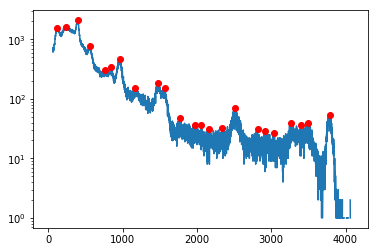

1 2
returned peaks: [141, 281, 407, 566, 840, 963, 1158, 1471, 1760, 1926, 2072, 2186, 2262, 2423, 2668, 2834, 2907, 2971, 3015, 3085, 3219, 3303, 3488, 3758, 3908, 4028]
len peaklist: 26


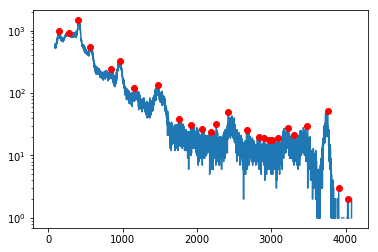

1 3
returned peaks: [114, 288, 586, 675, 836, 1055, 1252, 1402, 1507, 1741, 1959, 2055, 2102, 2310, 2477, 2782, 3074, 3161, 3237, 3285, 3321, 3356, 3409, 3463, 3510, 3546, 3592, 3630, 3676, 3743, 3816, 3857, 3892, 3936, 4000]
len peaklist: 35


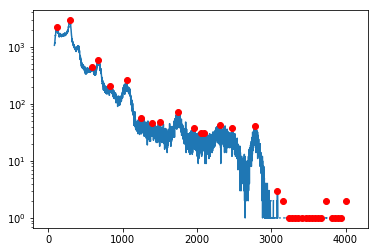

1 4
returned peaks: [252, 407, 573, 782, 861, 971, 1175, 1503, 1789, 1870, 2004, 2111, 2218, 2299, 2488, 2703, 2767, 2881, 2985, 3069, 3283, 3436, 3512, 3750, 3924, 3985]
len peaklist: 26


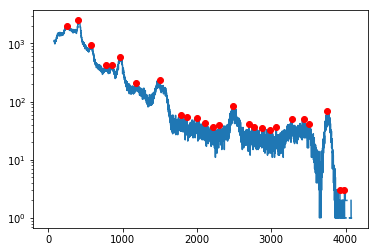

1 5
returned peaks: [271, 425, 590, 866, 982, 1164, 1515, 1790, 1950, 2000, 2134, 2172, 2516, 2766, 2991, 3319, 3397, 3464, 3770, 3948, 4032]
len peaklist: 21


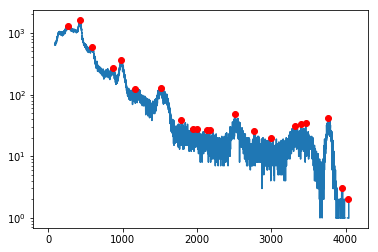

1 6
returned peaks: [155, 260, 429, 787, 872, 984, 1200, 1492, 1782, 1872, 1959, 2043, 2131, 2237, 2342, 2516, 2661, 2750, 2893, 2964, 3164, 3298, 3347, 3467, 3750, 3960, 4034]
len peaklist: 27


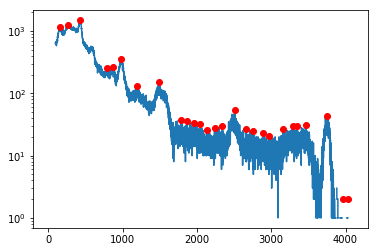

1 7
returned peaks: [145, 259, 421, 582, 853, 978, 1221, 1497, 1764, 1933, 2055, 2145, 2250, 2330, 2523, 2727, 2806, 2889, 2952, 3042, 3291, 3469, 3792, 3938, 4004]
len peaklist: 25


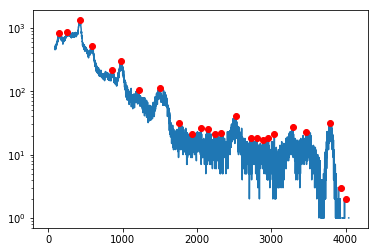

1 8
returned peaks: [146, 276, 417, 573, 762, 868, 971, 1205, 1472, 1791, 1959, 2032, 2183, 2287, 2464, 2688, 2759, 2952, 3018, 3240, 3397, 3727, 3945, 3983]
len peaklist: 24


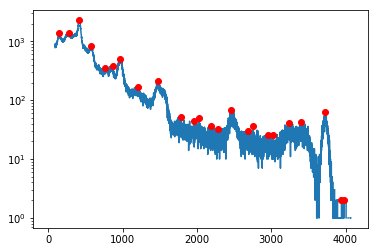

2 1
returned peaks: [117, 303, 399, 486, 582, 1005, 1257, 1502, 1801, 1989, 2241, 2763, 3120, 3378, 3635, 3761, 3882, 4020]
len peaklist: 18


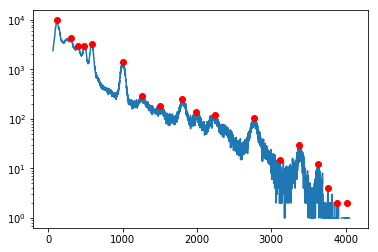

2 2
returned peaks: [143, 327, 416, 509, 596, 1003, 1253, 1493, 1787, 1973, 2166, 2351, 2709, 3113, 3367, 3606, 3717, 3754, 3842, 3960, 3998]
len peaklist: 21


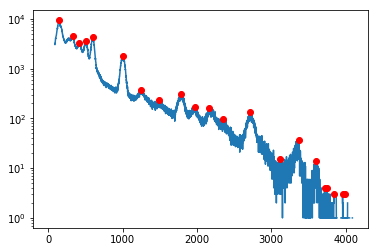

2 3
returned peaks: [110, 223, 416, 708, 873, 1056, 1264, 1530, 1910, 2303, 2365, 2560, 2644, 2802, 2870, 2961, 3038, 3076, 3113, 3149, 3232, 3303, 3386, 3490, 3575, 3654, 3717, 3759, 3794, 3830, 3866, 3902, 3939, 3978, 4013]
len peaklist: 35


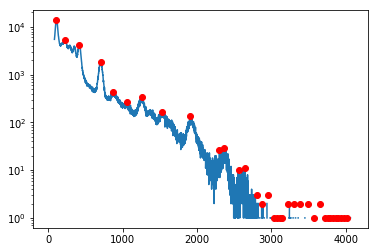

2 4
returned peaks: [138, 325, 422, 505, 606, 1022, 1273, 1491, 1536, 1815, 1977, 2225, 2775, 3366, 3640, 3763, 3925, 3974]
len peaklist: 18


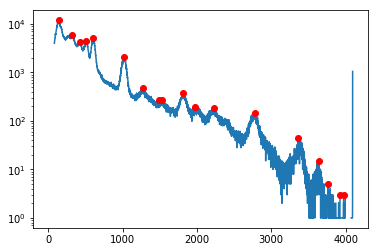

2 5
returned peaks: [143, 280, 345, 526, 614, 1034, 1277, 1535, 1690, 1834, 2004, 2218, 2411, 2633, 2794, 3262, 3384, 3605, 3671, 3754, 3791, 3834, 3951, 4014]
len peaklist: 24


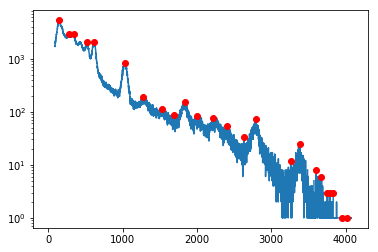

2 6
returned peaks: [157, 345, 526, 614, 1026, 1289, 1461, 1532, 1806, 1978, 2221, 2391, 2749, 3345, 3594, 3763, 3861, 4009]
len peaklist: 18


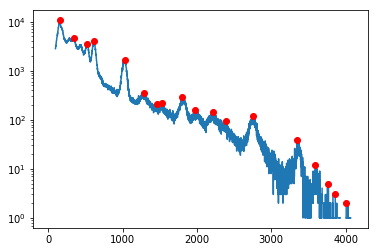

2 7
returned peaks: [148, 333, 426, 513, 612, 1028, 1264, 1509, 1797, 1976, 2212, 2742, 2887, 3180, 3352, 3532, 3659, 3804, 3848, 3934, 4010]
len peaklist: 21


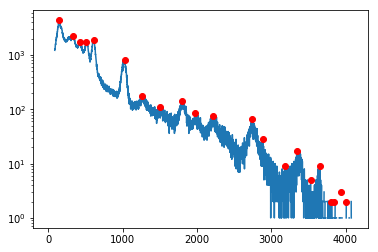

2 8
returned peaks: [143, 328, 420, 513, 596, 1011, 1245, 1515, 1793, 1972, 2167, 2355, 2727, 3120, 3341, 3602, 3721, 3766, 3852, 3909, 3981]
len peaklist: 21


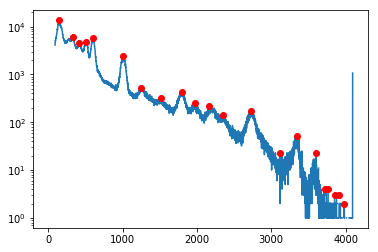

In [5]:
%run tryPeakfinder.py

In [7]:
# ^the smart way to have done that would've been to create a class for each measurement
# with the peaklist and pyplot graph as class variables to access

# maybe I'll go back and make my work more respectable if I ever need to present this

For thorium, we care about these three peaks:
* 238.6keV Pb-212(45)
* 583.1keV Ti-208(84.2)
* 2614.7keV Th-232(100)

In English, they look like the highest peak, the next major peak that rises up, and the final major peak.

For uranium, we want the first five "major peaks".

It is easiest to manually pick them out.

In [37]:
t1 = [396, 969, 3786]
t2 = [407, 963, 3758]
t3 = [228, 675, 2782]
t4 = [407, 971, 3750]
t5 = [425, 982, 3770]
t6 = [429, 984, 3750]
t7 = [421, 978, 3792]
t8 = [417, 971, 3727]
u1 = [117, 303, 582, 1005, 1801]
u2 = [143, 327, 596, 1003, 1787]
u3 = [110, 223, 416, 708, 1264]
u4 = [138, 325, 606, 1022, 1815]
u5 = [143, 345, 614, 1034, 1834]
u6 = [157, 345, 614, 1026, 1806]
u7 = [148, 333, 612, 1028, 1797]
u8 = [143, 328, 596, 1011, 1793]

In [38]:
c1 = t1 + u1
c2 = t2 + u2
c3 = t3 + u3
c4 = t4 + u4
c5 = t5 + u5
c6 = t6 + u6
c7 = t7 + u7
c8 = t8 + u8
en = [238.6, 583.1, 2614.7] + [92.6, 185.7, 352, 609.3, 1120.3]

In [39]:
def polyfit(x, b, m, r):
    return r * x*x + m*x + b

parameters: [  2.28440687e+01   5.41916348e-01   3.76858460e-05]
uncertainties: [  3.35479576e+00   5.46738658e-03   1.34263363e-06]
values: [b,m,r]


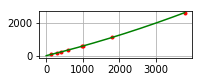

parameters: [  5.48484480e+00   5.62857651e-01   3.49645038e-05]
uncertainties: [  4.08012067e+00   6.63161522e-03   1.63081753e-06]
values: [b,m,r]


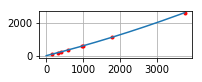

parameters: [  1.34086718e+01   8.19199953e-01   4.17008453e-05]
uncertainties: [  1.42714001e+01   3.25924722e-02   1.08763572e-05]
values: [b,m,r]


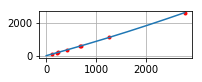

parameters: [  1.39003661e+01   5.36933214e-01   4.17187749e-05]
uncertainties: [  4.82423122e+00   7.80199079e-03   1.92637163e-06]
values: [b,m,r]


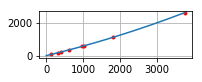

parameters: [  8.34243739e+00   5.33653226e-01   4.17704802e-05]
uncertainties: [  7.07623197e+00   1.13016263e-02   2.76922842e-06]
values: [b,m,r]


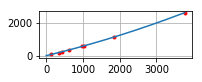

parameters: [ -2.02075395e+00   5.53041875e-01   3.85890291e-05]
uncertainties: [  4.45148212e+00   7.12750919e-03   1.75046988e-06]
values: [b,m,r]


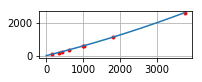

parameters: [  2.17767723e-01   5.59815499e-01   3.42355776e-05]
uncertainties: [  4.41122032e+00   7.05706682e-03   1.71679441e-06]
values: [b,m,r]


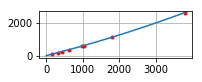

parameters: [  7.17878138e+00   5.51353851e-01   3.97620029e-05]
uncertainties: [  4.34163057e+00   7.05395363e-03   1.74883365e-06]
values: [b,m,r]


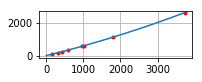

In [41]:
plt.subplot(421)
plt.plot(c1, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c1, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.grid(True)
plt.plot(polyfit(range(max(c1)), *xpopt), 'g')
plt.show()

plt.subplot(422)
plt.plot(c2, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c2, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(c2)), *xpopt))
plt.grid(True)
plt.show()

plt.subplot(423)
plt.plot(c3, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c3, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(c3)), *xpopt))
plt.grid(True)
plt.show()

plt.subplot(424)
plt.plot(c4, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c4, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(c4)), *xpopt))
plt.grid(True)
plt.show()

plt.subplot(425)
plt.plot(c5, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c5, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(c5)), *xpopt))
plt.grid(True)
plt.show()

plt.subplot(426)
plt.plot(c6, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c6, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(c6)), *xpopt))
plt.grid(True)
plt.show()

plt.subplot(427)
plt.plot(c7, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c7, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(c7)), *xpopt))
plt.grid(True)
plt.show()

plt.subplot(428)
plt.plot(c8, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, c8, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(c8)), *xpopt))
plt.grid(True)
plt.show()

Everything looks about right!